### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1097]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1098]:
data = pd.read_csv('coupons.csv')

In [1099]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [952]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [1100]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

<p style="font-weight: bold">There are some columns defined as object that need to be treated as numerical in order to facilitate the follow up analysis. As a result, It was decided to start off with the following columns: expiration and age</p>

<p>3.1. Column: expiration. It was decided to convert everything to hours. So, its type can be defined as a numerical.</p>

In [1101]:
data['expiration'].value_counts()

1d    7091
2h    5593
Name: expiration, dtype: int64

In [1102]:
data["expiration"]=data["expiration"].str.replace("1d","24")
data["expiration"]=data["expiration"].str.replace("2h","2")

In [1103]:
data["expiration"]=pd.to_numeric(data["expiration"])

<p>3.2. Column: income. It was decide to replace all blank spaces sign "$", and "-" into " ". It was also decided to replace the income range into their averages.So, its type can be defined as a numerical.</p>

In [1104]:
data['income'].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

In [1105]:
data["income"]=data["income"].str.replace("$"," ",regex=True)
data["income"]=data["income"].str.replace("-"," ",regex=True)
data["income"]=data["income"].str.replace(" ","",regex=True)

In [1106]:
data["income"]=data["income"].str.replace("2500037499","31250",regex=True)
data["income"]=data["income"].str.replace("1250024999","18750",regex=True)
data["income"]=data["income"].str.replace("3750049999","43750",regex=True)
data["income"]=data["income"].str.replace("100000orMore","100000",regex=True)
data["income"]=data["income"].str.replace("5000062499","56250",regex=True)
data["income"]=data["income"].str.replace("Lessthan12500","12499",regex=True)
data["income"]=data["income"].str.replace("8750099999","93750",regex=True)
data["income"]=data["income"].str.replace("7500087499","81250",regex=True)
data["income"]=data["income"].str.replace("6250074999","68750",regex=True)

In [1107]:
data["income"]=pd.to_numeric(data["income"])

<p>3.3. Column: Bar. It was decide to replace all by single values, most of them representing their average. So, its type can be defined as a numerical.</p>

In [1108]:
data['Bar'].value_counts()

never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: Bar, dtype: int64

In [1109]:
data["Bar"]=data["Bar"].str.replace("never","0")
data["Bar"]=data["Bar"].str.replace("less1","1")
data["Bar"]=data["Bar"].str.replace("1~3","2")
data["Bar"]=data["Bar"].str.replace("4~8","6")
data["Bar"]=data["Bar"].str.replace("gt8","9")

In [1110]:
data["Bar"]=pd.to_numeric(data["Bar"])

<p>3.4. Column: CoffeHouse. It was decide to replace all by single values, most of them representing their average. So, its type can be defined as a numerical.</p

In [1111]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

In [1113]:
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("never","0")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("less1","1")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("1~3","2")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("4~8","6")
data["CoffeeHouse"]=data["CoffeeHouse"].str.replace("gt8","9")

In [1114]:
data["CoffeeHouse"]=pd.to_numeric(data["CoffeeHouse"])

<p>3.5. Column: CarryAway. It was decide to replace all by single values, most of them representing their average. So, its type can be defined as a numerical.</p

In [1115]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [1116]:
data["CarryAway"]=data["CarryAway"].str.replace("never","0")
data["CarryAway"]=data["CarryAway"].str.replace("less1","1")
data["CarryAway"]=data["CarryAway"].str.replace("1~3","2")
data["CarryAway"]=data["CarryAway"].str.replace("4~8","6")
data["CarryAway"]=data["CarryAway"].str.replace("gt8","9")

In [1117]:
data["CarryAway"]=pd.to_numeric(data["CarryAway"])

<p>3.6. Column: RestaurantLessThan20. It was decide to replace all by single values, most of them representing their average. So, its type can be defined as a numerical.</p

In [1118]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

In [1119]:
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("never","0")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("less1","1")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("1~3","2")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("4~8","6")
data["RestaurantLessThan20"]=data["RestaurantLessThan20"].str.replace("gt8","9")

In [1120]:
data["RestaurantLessThan20"]=pd.to_numeric(data["RestaurantLessThan20"])

<p>3.7. Column: Restaurant20To50. It was decide to replace all by single values, most of them representing their average. So, its type can be defined as a numerical.</p

In [1121]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

In [1123]:
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("never","0")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("less1","1")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("1~3","2")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("4~8","6")
data["Restaurant20To50"]=data["Restaurant20To50"].str.replace("gt8","9")

In [1124]:
data["Restaurant20To50"]=pd.to_numeric(data["Restaurant20To50"])

<p>3.8. Column: Age. It was decide to replace a couple of items ("50plus" and "below21") by single values. So, its type can be defined as a numerical.</p

In [1125]:
data['age'].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [1126]:
data["age"]=data["age"].str.replace("50plus","51")
data["age"]=data["age"].str.replace("below21","20")

In [1127]:
data["age"]=pd.to_numeric(data["age"])

4. What proportion of the total observations chose to accept the coupon? 



In [1128]:
ans41=(data.query("Y==1")["Y"].count())/len(data["Y"])
print(ans41)

0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [1129]:
totalcoupon=data["coupon"].value_counts()
totalcoupon = totalcoupon.to_frame()
totalcoupon.columns = ['totalcoupon1']
totalcoupon.index.names = ['Namecoupon']
totalcoupon['Namecoupon'] = totalcoupon.index

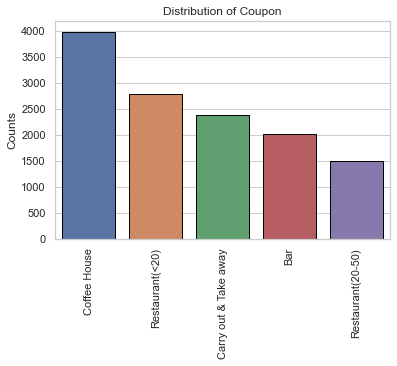

In [1130]:
sns.barplot(x="Namecoupon", y="totalcoupon1",data=totalcoupon,edgecolor="black")
plt.title('Distribution of Coupon')
# Set x-axis label
plt.xlabel('')
# Set y-axis label
plt.ylabel('Counts')
plt.xticks(rotation = 90)
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/distributioncoupons.png')

6. Use a histogram to visualize the temperature column.

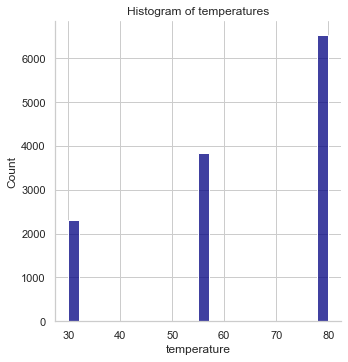

In [1131]:
sns.displot(data['temperature'],kind="hist",color="navy")
plt.title('Histogram of temperatures')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/histogramtemperatures.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1132]:
df1=pd.DataFrame(data.query('coupon=="Bar"')["coupon"].values, data.query('coupon=="Bar"')["coupon"].index,columns=["Bar"])

2. What proportion of bar coupons were accepted?


In [1133]:
k=0
for j in range(0,len(df1)):
    if data["Y"][df1.index[j]]==1:
        k=k+1
ans=(k/len(data["Y"]))
print(ans)

0.065200252286345


<h4 style="color:red">Answer:</h4><p> the proportion of the bar coupon accepted was only 0.0652</p>

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


<p>Acceptance rate for those who went to a bar 3 or fewer times a month:</p>

In [1134]:
ans31=((data.query("Bar<=2 & Y==1")["Bar"].dropna().count())/len(data["Bar"].dropna()))*100
print(ans31)

49.83700405502107


<p>Acceptance rate for those who who went to a bar more than 3 times a month:</p>

In [1135]:
ans32=((data.query("Bar>2 & Y==1")["Bar"].dropna().count())/len(data["Bar"].dropna()))*100
print(ans32)

7.0525562534785715


<h4 style="color:red">Answer:</h4><p> The acceptance rate for those who went to a bar 3 or fewer times a month is much higher with a value around 50%</p>

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


<p>Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25:</p>

In [1136]:
ans41=(data.query("Bar >1 & age>25 & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))*100
print(ans41)

13.72346346505526


<p>Acceptance rate for all others:</p>

In [1137]:
ans42=(data.query("Y==1")["Bar"].dropna().count()-data.query("Bar >1 & age>25 & Y==1")["Bar"].dropna().count())/len(data["Bar"].dropna())*100
print(ans42)

43.166096843444386


<h4 style="color:red">Answer:</h4><p> The acceptance rate for all others is higher with a value around 43%</p>

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

<h4 style="color:blue">Note:</h4><p> The acceptance rate is not used in this exercise, since it is not stated in the question</p>

 <h4 style='color:red '> Solution:</h4>
        <p style="font-weight: bold">My hypothesis is the following:<p> Null Hypothesis:</p></p> ${H}_{0} : {\mu}_{Bar>25} - {\mu}_{Bar}=0  $ <br>
        <p> Alternative Hypothesis:</p><br>${H}_{1} : {\mu}_{Bar>25} -  {\mu}_{Bar} > 0$ <br> <p> where ${\mu}_{Bar}$ represents the mean of all other drivers,and ${\mu}_{Bar>25}$ represents the mean of the drivers who go to the bar more than once and are over 25</p>

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

<h4 style="color:red">Solution:</h4><p>it consists on several steps as follows:</p>

<p>Distribution of the drivers who go to the bar more than once and are over 25:</p>

In [1138]:
X61=np.random.choice(data.query("Bar > 1 and age>25")["Bar"].dropna(),10000)

<p>Distribution of all other drivers:</p>

In [1139]:
data1=[]
k=0
for j in range(0,len(data["Bar"])):
    if (data["Bar"][j]>1) & (data["age"][j]>25):
        k+=1
    else:
        data1.append(data["Bar"][j])
data1 = np.array(data1)
data1 = data1[~np.isnan(data1)]
X62=np.random.choice(data1,10000)

<p> Generate a distribution Z which is a mixture of estimated distribution of the drivers who go to the bar more than once and are over 25 and the estimated distribution of all other drivers: </p>

In [1140]:
Z = np.hstack((X61,X62))

<p>Estimate the mean of the difference of X61 and X62:</p>

In [1141]:
mean_diff = np.mean( X61 - X62)
print(mean_diff)

2.8784


<p>Create a for loop that will randomly sample the combined data set Z to produce two random sets px and py. We’ll inspect the distribution of the mean differences between px and py:</p>

In [1142]:
n = 4999
diff = np.zeros((n,))

for j in range(n):
     
    pxi = np.random.choice( np.arange(20), 10 )
    pyi = [ i for i in np.arange(20) if i not in pxi ]
     
    px = np.mean( [ Z[i] for i in pxi ] )
    py = np.mean( [ Z[i] for i in pyi ] )
     
    diff[j] = px - py

Text(5.960000000000001, 0.5, 'Frequency')

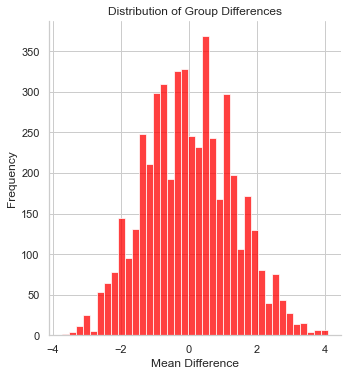

In [1143]:
sns.displot(diff,kind="hist",color="red")
plt.title('Distribution of Group Differences')
# Set x-axis label
plt.xlabel('Mean Difference')
# Set y-axis label
plt.ylabel('Frequency')

<p>Estimation of the p-value:</p>

In [1144]:
p_value = len( np.where( diff >= mean_diff )[0] )/n
print (p_value)

0.014602920584116823


<h3 style="color:red">Conclusion to question 6:</h3> <h4> The p_value=0.0146 is less than ${\alpha}=0.05$ so we do reject ${H}_{0}$, i.e. the null hypothesis.</h4>

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


<h4 style="color:blue">Note:</h4><p> It is understood that the comparison is between the acceptance rate of drivers who go to the bars more than once a month and had passengers that were not a kid,  and the acceptance rate of drivers who go to the bars more than once a month and had occupations other than farming, fishing, or forestry</p>

<h4 style='color:red '> Solution:</h4><p style="font-weight: bold">My hypothesis is the following:
<p> Null Hypothesis:</p></p> ${H}_{0} : {\delta}_{BarNK} = {\delta}_{BarFFF} $ <br>
<p> Alternative Hypothesis:</p><br>${H}_{1} : {\delta}_{BarNK} \neq {\delta}_{BarFFF} $ <br> <p> where ${\delta}_{BarNK}$ represents the acceptance rate of drivers who go to the bars more than once a month and had passengers that were not a kid, ${\delta}_{BarFFF}$ represents the acceptance rate of drivers who go to the bars more than once a month and had occupations other than farming, fishing, or forestry</p>

<p>Acceptance rate for driver who go to the bar more than once and had passangers that were not a kid: ${\delta}_{BarNK}= 18.311$</p>

In [1145]:
ans71=(data.query("Bar >1 & passanger!='Kid(s)' & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))*100
print(ans71)

18.31120298958416


<p>Acceptance rate for driver who go to the bar more than once and had had occupations other than farming, fishing, or forestry: ${\delta}_{BarFFF}= 19.2812$</p>

In [1146]:
ans72=(data.query("Bar >1 & occupation!='Farming Fishing & Forestry' & Y==1")["Bar"].dropna().count()/len(data["Bar"].dropna()))*100
print(ans72)

19.281227637751453


In [1147]:
(ans72-ans71)/ans72

0.05030927835051563

<h4 style="font-weight: bold;text-decoration: underline">Observation: </h4><h5>Percentage difference:  Diff = ${\delta}_{BarFFF}$ and $ {\delta}_{BarNK} $ is equal to 5.03%</h5>

<h4 style="color:red">Conclusion to question 7:</h4>
<p> using $ {\alpha}=0.05 $, which is the equivalence of a 5%, and observing that Diff is about the same, we may tend to accept by a hair ${H}_{0}$, i.e. the null hypothesis.

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



<p>go to bars more than once a month, had passengers that were not a kid, and were not widowed OR:</p>

In [1148]:
ans81=(data.query("Bar>1 & passanger!='Kid(s)'& maritalStatus!='Widowed' & Y==1")["passanger"].count()/len(data["passanger"]))*100
print(ans81)

18.15673289183223


<p>go to bars more than once a month and are under the age of 30 OR:</p>

In [1149]:
ans82=(data.query("Bar>1 & age<30 & Y==1")["passanger"].dropna().count()/len(data["passanger"]))*100
print(ans82)

11.250394197414066


<p>go to cheap restaurants more than 4 times a month and income is less than 50K:</p>

In [1150]:
ans83=(data.query("RestaurantLessThan20>=6 & income<50000 & Y==1")["passanger"].count()/len(data["passanger"]))*100
print(ans83)

10.793125197098707


<h4 style="color:red">Answer:</h4><p> The acceptance rate is higher for the those passengers who go to bars more than once a month, had passengers that were not a kid, and were not widowed OR with acceptance rate around 18%</p>

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

<h4 style="color:red">Answer:</h4><p> I can make a hypothesis saying that the passengers that were not a kid, and not widowed are more likely to have accepted the bar coupon.</p>

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<h4 style="color:red">Note: </h4><p> The goal of this project/independent investigation  is to use what is known about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not, i.e, not being focus about a single coupon group only!</p>

<h4 style="font-weight:bold">Prior Observations:</h4><p>Before embarking in any further analysis, it is important to understand the data being used, in particular, if it is biased. As shown in Figure 1A, the histogram of the passengers indicates that most are under the category " Alone" by a wide margin. As expected, this effect is propagated through distribution of coupons accepted (Y=1) per passenger category as shown in Figure 1B, likewise for coupons not accepted (Y=0) as shown in Figure 1C. Consequently, I firmly believe that using joint probability seems the right approach to properly answer the question: Will the customer accept the coupon?. However, understanding the social, and economical situation/behaviors of the passenger who accepted or did not accept the coupons needs to be done first.</p>

<h4 style="color:red">Figure 1A: </h4><p>Histogram of drivers without/with passengers</p>

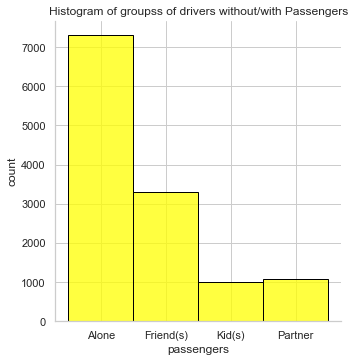

In [1307]:
sns.displot(data["passanger"],kind="hist",color="yellow", edgecolor="black")
plt.title('Histogram of groupss of drivers without/with Passengers')
# Set x-axis label
plt.xlabel('passengers')
# Set y-axis label
plt.ylabel('count')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/histogramdriverswithout_withpassengers.png')

<h4 style="color:red">Figure 1B:</h4><p>Countplot of Coupons Accepted (Y=1) by drivers without/with Passengers categories</p>

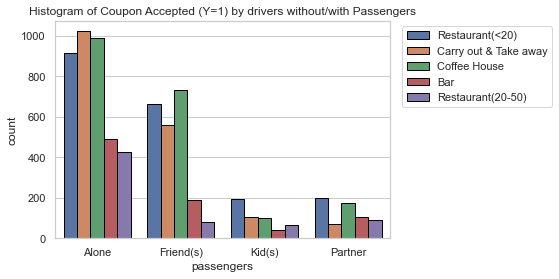

In [1304]:
sns.countplot(x="passanger", data=data.query("Y==1"),hue="coupon",edgecolor="black")
plt.title('Histogram of Coupon Accepted (Y=1) by drivers without/with Passengers')
# Set x-axis label
plt.xlabel('passengers')
# Set y-axis label
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/countplotacceptedcouponbypassengers.png')

<h4 style="color:red">Figure 1C:</h4><p>Distribution of Coupon not Accepted (Y=0) by drivers without/with Passengers categories</p>

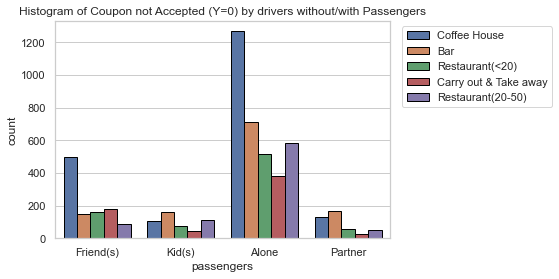

In [1155]:
sns.countplot(x="passanger", data=data.query("Y==0"),hue="coupon",edgecolor="black")
plt.title('Histogram of Coupon not Accepted (Y=0) by drivers without/with Passengers')
# Set x-axis label
plt.xlabel('passengers')
# Set y-axis label
plt.ylabel('count')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/countplotnoacceptedcouponbypassengers.png')

<h4 style="color:red">Figure 1D:</h4><p>Combine histogram of Coupon Accepted (Y=1) and not Accepted (Y=0) by drivers without/with Passenger Categories, and coupons</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>This catplot plot is very illustrative, since it is well clear that the "Restaurant(<20)" and "Carry Out & Take away" coupons are favored in term of acceptance compare to the rest of coupons, i.e. ("Bar", "Restaurant(20-50)")</p>

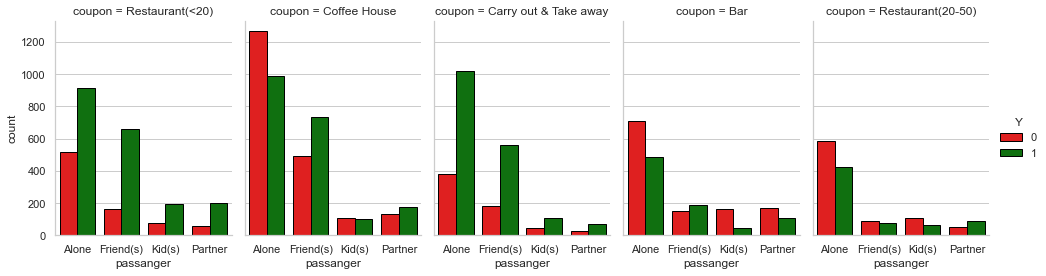

In [1156]:
sns.catplot(x="passanger", data=data,col="coupon",hue="Y",edgecolor="black",kind="count",
                height=4, aspect=0.7,palette=sns.color_palette(['red', 'green']))
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/catplotcouponacceptednoaccepteddriversbypassenger.png')

<h4 style="color:red">Figure 1E:</h4><p>Combine histogram of Coupon Accepted (Y=1) and not Accepted (Y=0) by Passenger Categories, and expiration of the coupon (2h and 24h).</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>Again, the catplot is very illustrative, since it is well clear that the drivers with/without passengers accepted much more the coupons that expire in 24 hours (i.e, 1 day).</p>

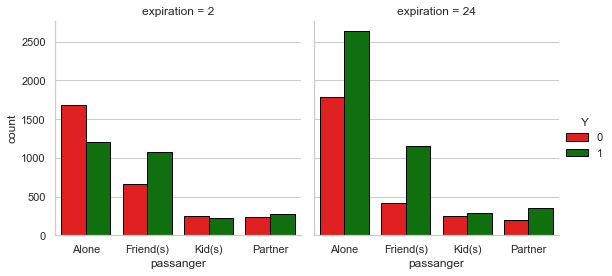

In [1157]:
sns.catplot(x="passanger", data=data,col="expiration",hue="Y",edgecolor="black",kind="count",
                height=4, aspect=1,palette=sns.color_palette(['red', 'green']))
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/catplotexpirationacceptednoaccepteddriversbypassenger.png')

<h4 style="color:red">Figure 1F:</h4><p>Combine histogram of Coupon Accepted (Y=1) and not Accepted (Y=0) by drivers without/with Passenger Categories, and Ages.</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>The catplot below indicates that drivers with /without passengers with ages of 21 and 26 are much more keen to accept the coupons</p>

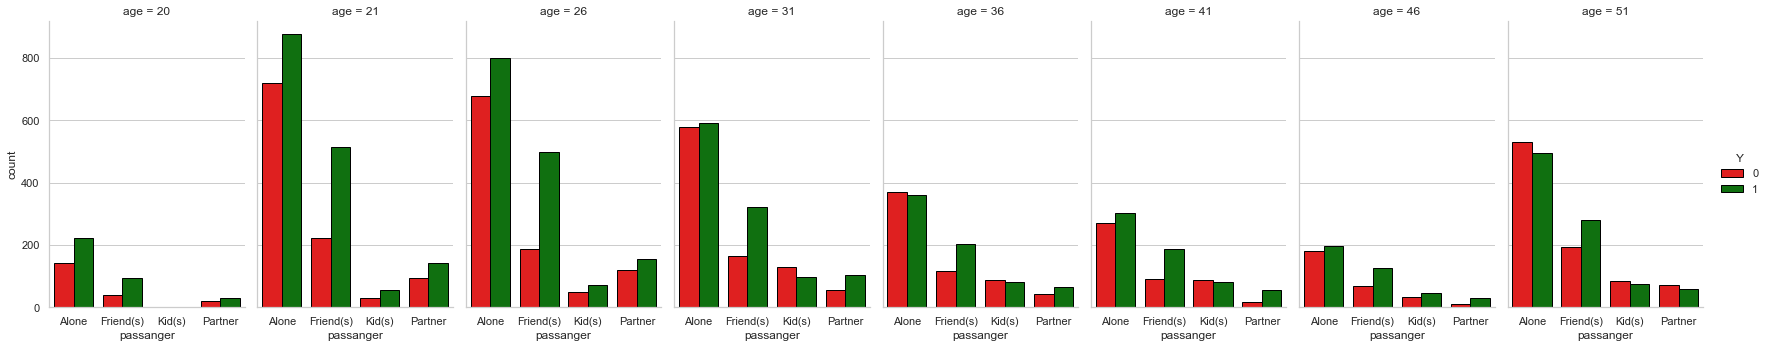

In [1158]:
sns.catplot(x="passanger", data=data,col="age",hue="Y",edgecolor="black",kind="count",
                height=5, aspect=0.6,palette=sns.color_palette(['red', 'green']))
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/catplotagesacceptednoaccepteddriversbypassenger.png')

<h4 style="color:red">Figure 1G:</h4><p>Combine histogram of Coupon Accepted (Y=1) and not Accepted (Y=0) by drivers without/with Passenger Categories, and Marital Status (2h and 24h).</p>

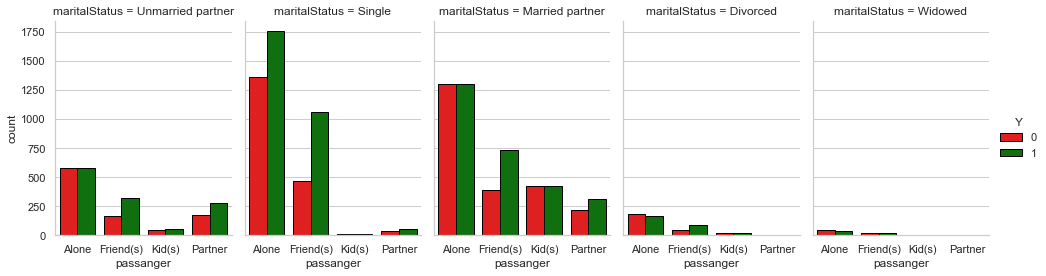

In [1161]:
sns.catplot(x="passanger", data=data,col="maritalStatus",hue="Y",edgecolor="black",kind="count",
                height=4, aspect=0.7,palette=sns.color_palette(['red', 'green']))
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/catplotmaritalstatusacceptednoaccepteddriversbypassenger.png')

<h4 style="color:red">Figure 1H:</h4><p>Combine histogram of Coupon Accepted (Y=1) and not Accepted (Y=0) by drivers without/with  Passenger Categories, and Temperatures.</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>The catplot below indicates that drivers with /without passengers  are more keen to accept the coupons when temperatures are warmer</p>

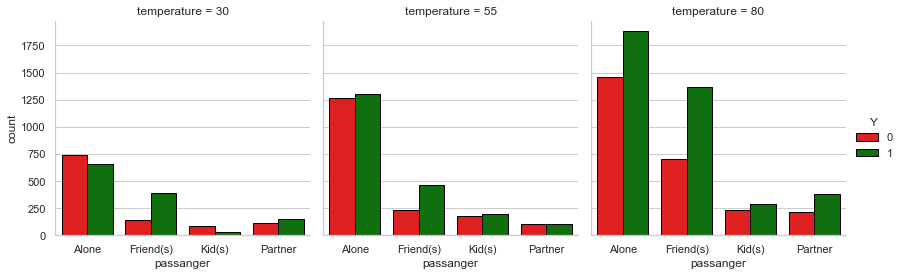

In [1163]:
sns.catplot(x="passanger", data=data,col="temperature",hue="Y",edgecolor="black",kind="count",
                height=4, aspect=1,palette=sns.color_palette(['red', 'green']))
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/catplottemperaturesacceptednoaccepteddriversbypassenger.png')

<h4 style="color:red">Figure 1I:</h4><p>Combine distribution of Coupon Accepted (Y=1) and not Accepted (Y=0) by drivers without/with Passenger Categories, and Weather.</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>The catplot below indicates that drivers with /without passengers  are more than willing to accept the coupons when the day is sunny.</p>

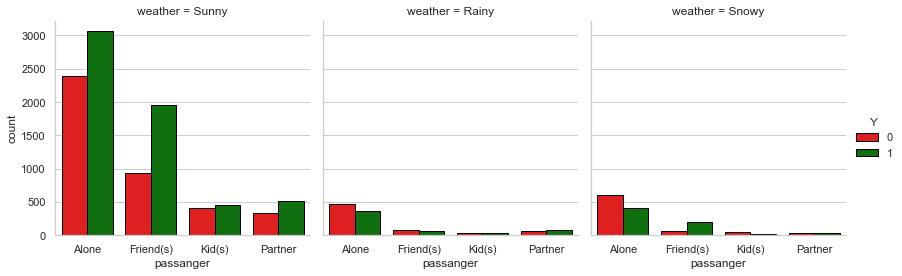

In [1165]:
sns.catplot(x="passanger", data=data,col="weather",hue="Y",edgecolor="black",kind="count",
                height=4, aspect=1,palette=sns.color_palette(['red', 'green']))
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/catplotweatheracceptednoaccepteddriversbypassenger.png')

<h4 style="color:red">Figure 1I:</h4><p>Combine distribution of Coupon Accepted (Y=1) and not Accepted (Y=0) by drivers with/without Passenger Categories, and Gender.</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>The catplot below indicates that the male drivers with /without passengers  seem to accept more the coupons than not when compare with the female drivers.</p>

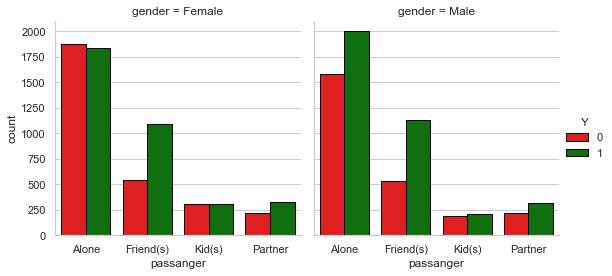

In [1166]:
sns.catplot(x="passanger", data=data,col="gender",hue="Y",edgecolor="black",kind="count",
                height=4, aspect=1,palette=sns.color_palette(['red', 'green']))
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/catplotgenderacceptednoaccepteddriversbypassenger.png')

<h3 style="Font:Bold">Income ranges for different levels in the passanger column of the data DataFrame using Seaborn Boxplot:</h3>

<h4 style="color:red">Figure 2A:</h4><p>Boxplot for Income by drivers with/without passengers who did accept the coupon (Y=1)</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>The boxplot Figure 2A below indicates that the drivers without passsenger, i.e, "Alone", and with "Friends" have about the same median income, but quite lower than the rest of drivers with  passenger groups  "Kid(s)", and "Partner".</p><p> Quite similar observation is applied by comparing </p><p style="font-weight: bold">the mean income among those groups who accepted the coupon as indicated by the white small circle markers posted </p> <p>on same aforementioned figure.These observations make sense based on figure 1B, where the groups that did accept more coupon are the drivers without passenger, i.e, "Alone", and the ones with "Friend(s)". Basically, it is expected that groups with lower income media will be more keen to accept coupons. it is also important to highlight that the drivers without/with passengers who did not accept the coupon (Y=0) have higher mean income.</p>

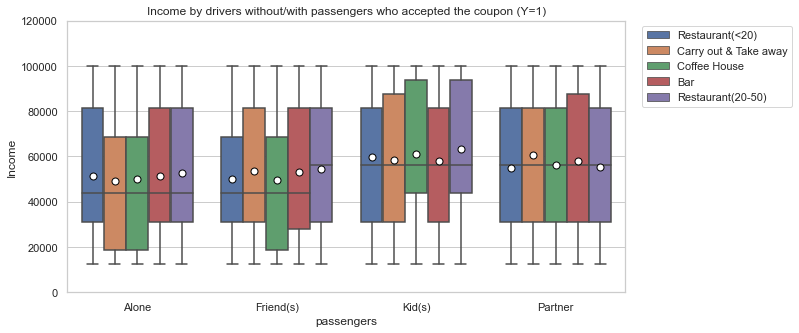

In [1300]:
plt.figure(figsize=(10,5))
plt.ylim(0,120000)
sns.boxplot(x='passanger', y='income', hue="coupon",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data.query("Y==1"))
plt.title("Income by drivers without/with passengers who accepted the coupon (Y=1)")
# Set x-axis label
plt.xlabel('passengers')
# Set y-axis label
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Income')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/boxplotincomeacceptbypassenger.png')
plt.show()

<h4 style="color:red">Figure 2B:</h4><p>Boxplot for Income by drivers with/without passengers who did not accept the coupon (Y=0)</p>

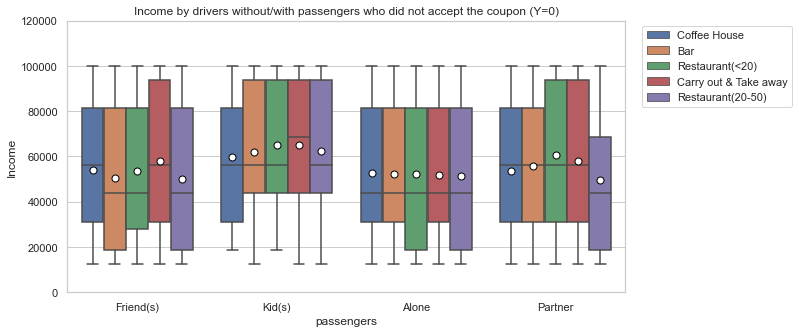

In [1168]:
plt.figure(figsize=(10,5))
plt.ylim(0,120000)
sns.boxplot(x='passanger', y='income', hue="coupon",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data.query("Y==0"))
plt.title("Income by drivers without/with passengers who did not accept the coupon (Y=0)")
# Set x-axis label
plt.xlabel('passengers')
# Set y-axis label
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Income')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/boxplotincomenoacceptbypassenger.png')
plt.show()

<h4 style="color:red">Figure 2C:</h4><p>Boxplot for Ages by drivers with/without passengers who did accept the coupon (Y=1)</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>The boxplot Figure 2C below indicates that the drivers without passsenger, i.e, "Alone", and with "Friends"  have about the same mean age range (please see the small white circles) the through the different coupons categories, i.e. drivers without and with the aforementioned passengers in their early 30's are more willing to accept the coupons (Y=1). Conversely, the drivers with / without passengers who did not accept the coupon (Y=0) are a bit older as shown on figure 2D. </p>

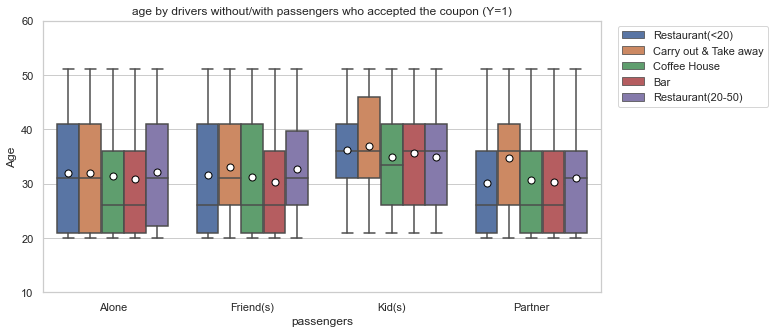

In [1173]:
plt.figure(figsize=(10,5))
plt.ylim(10,60)
sns.boxplot(x='passanger', y='age', hue="coupon",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data.query("Y==1"))
plt.title("age by drivers without/with passengers who accepted the coupon (Y=1)")
# Set x-axis label
plt.xlabel('passengers')
# Set y-axis label
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Age')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/boxplotagesacceptbypassenger.png')
plt.show()

<h4 style="color:red">Figure 2D:</h4><p>Boxplot for Ages by drivers with/without passengers who did accept the coupon (Y=0)</p>

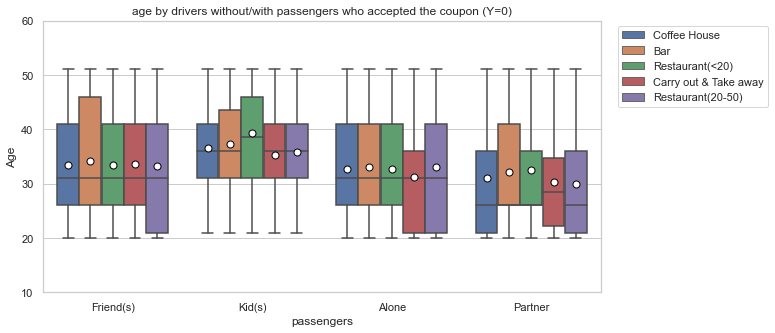

In [1174]:
plt.figure(figsize=(10,5))
plt.ylim(10,60)
sns.boxplot(x='passanger', y='age', hue="coupon",showmeans=True,meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"7"},data=data.query("Y==0"))
plt.title("age by drivers without/with passengers who accepted the coupon (Y=0)")
# Set x-axis label
plt.xlabel('passengers')
# Set y-axis label
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylabel('Age')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/boxplotagesnoacceptbypassenger.png')
plt.show()

<h4 style="color:red">Figure 3A:</h4><p>Compare the income for the combinations of levels in drivers without/with passenger who did accept the coupon (Y=1), and coupon columns using Pandas Pivot and Seaborn Heatmap</p>

<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>The heatmap below clearly indicates that the drivers without passengersi.e, "Alone" that accepted coupons seem to earn less income as evidenced by the less intense red colors.</p>

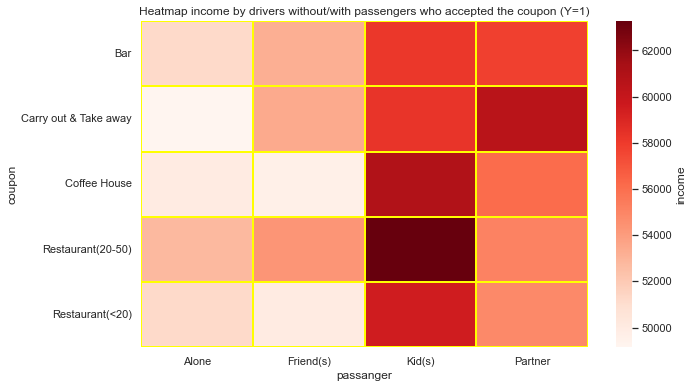

In [1305]:
def feature_interactions(df,feature1, feature2,continuous_col):
    group = df.groupby([feature1,feature2],as_index=False)[continuous_col].mean().reset_index(drop=True)
    pivot = group.pivot(index=feature1, columns=feature2, values=continuous_col)
    pivot.fillna(0, inplace=True)
    plt.figure(figsize=(10,6))
    plt.title("Heatmap income by drivers without/with passengers who accepted the coupon (Y=1)")
    sns.heatmap(pivot,cmap='Reds',linewidths=2, linecolor='yellow',cbar_kws={'label': 'income'})
    plt.savefig('Will-a-Customer-Accept-the-Coupon/images/heatmapincomecceptbypassenger.png')
    plt.show()

feature_interactions(data.query("Y==1"),'coupon','passanger','income')

<h4 style="color:red">Figure 3B:</h4><p>Compare the income for the combinations of levels in drivers without/with passenger who did not accept the coupon (Y=0), and coupon columns using Pandas Pivot and Seaborn Heatmap</p>

In [ ]:
<p style="font-weight: bold;text-decoration: underline">Observation: </p><p>Same aforementioned comments made on Figure 3A are applicable when coupons are not accepted.</p>

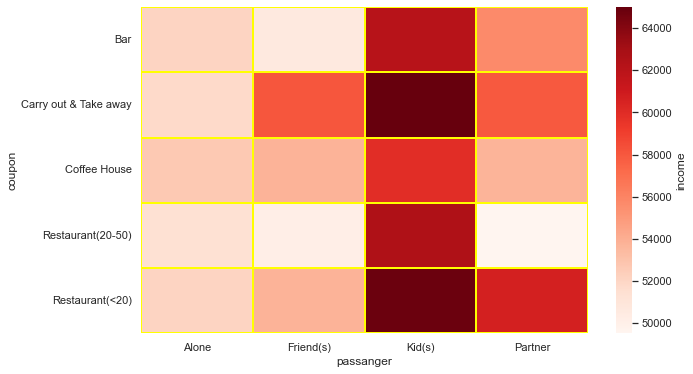

In [1177]:
def feature_interactions(df,feature1, feature2,continuous_col):
    group = df.groupby([feature1,feature2],as_index=False)[continuous_col].mean().reset_index(drop=True)
    pivot = group.pivot(index=feature1, columns=feature2, values=continuous_col)
    pivot.fillna(0, inplace=True)
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot,cmap='Reds',linewidths=2, linecolor='yellow',cbar_kws={'label': 'income'})
    plt.savefig('Will-a-Customer-Accept-the-Coupon/images/heatmapincomenoacceptbypassenger.png')
    plt.show()

feature_interactions(data.query("Y==0"),'coupon','passanger','income')

<h3 style="Font:Bold">Conditional Probababilities  & Visualization of results for each drivers without and with passengers  categories who accepted (Y=1) and did not accept(Y=0) the  coupons ("Restaurant(<20)","Coffee House","Carry out & Take away","Bar", "Restaurant(20-50)").</h3>

<h4 style="Font:Bold">4. Estimation Conditional Probababilities for drivers without passanger ('Alone') who acceped and did not accept the different coupons ("Restaurant(<20)", "Coffee House","Carry out & Take away","Bar","Restaurant(20-50)")</h4>

<h4 style="color:red">4A.</h4><p> What is the probability given that drivers without passanger ('Alone') accepted "Restaurant(<20)"" coupon?

In [1178]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_acceptedRestaurant20 =data.query("passanger =='Alone' & coupon=='Restaurant(<20)' & Y ==1")["passanger"].value_counts()
p_Alone_passanger_acceptedRestaurant20_Alone_passanger =(Alone_passanger_acceptedRestaurant20/Alone_passanger_1)
print(p_Alone_passanger_acceptedRestaurant20_Alone_passanger)

Alone    0.125394
Name: passanger, dtype: float64


<h4 style="color:red">4B.</h4><p> What is the probability given that drivers without passanger ('Alone') did not accept "Restaurant(<20)"" coupon?

In [1179]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_noacceptedRestaurant20=data.query("passanger =='Alone' & coupon=='Restaurant(<20)' & Y ==0")["passanger"].value_counts()
p_Alone_passanger_noacceptedRestaurant20_Alone_passanger=(Alone_passanger_noacceptedRestaurant20/Alone_passanger_1)
print(p_Alone_passanger_noacceptedRestaurant20_Alone_passanger)

Alone    0.071047
Name: passanger, dtype: float64


<h4 style="color:red">4C.</h4><p> What is the probability given that drivers without passanger ('Alone') accepted "Coffee House" coupon?

In [1180]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_acceptedCoffeeHouse=data.query("passanger =='Alone' & coupon=='Coffee House' & Y ==1")["passanger"].value_counts()
p_Alone_passanger_acceptedCoffeeHouse_Alone_passanger=(Alone_passanger_acceptedCoffeeHouse/Alone_passanger_1)
print(p_Alone_passanger_acceptedCoffeeHouse_Alone_passanger)

Alone    0.13525
Name: passanger, dtype: float64


<h4 style="color:red">4D.</h4><p> What is the probability given that drivers without passanger ('Alone') did not accept "Coffee House" coupon?

In [1181]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_noacceptedCoffeeHouse=data.query("passanger =='Alone' & coupon=='Coffee House' & Y ==0")["passanger"].value_counts()
p_Alone_passanger_noacceptedCoffeeHouse_Alone_passanger=(Alone_passanger_noacceptedCoffeeHouse/Alone_passanger_1)
print(p_Alone_passanger_noacceptedCoffeeHouse_Alone_passanger)

Alone    0.17358
Name: passanger, dtype: float64


<h4 style="color:red">4E.</h4><p> What is the probability given that drivers without passanger ('Alone') accepted "Carry out & Take away" coupon?

In [1182]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_acceptedCarryoutTakeaway=data.query("passanger =='Alone' & coupon=='Carry out & Take away' & Y ==1")["passanger"].value_counts()
p_Alone_passanger_acceptedCarryoutTakeaway_Alone_passanger=(Alone_passanger_acceptedCarryoutTakeaway/Alone_passanger_1)
print(p_Alone_passanger_acceptedCarryoutTakeaway_Alone_passanger)

Alone    0.139904
Name: passanger, dtype: float64


<h4 style="color:red">4F.</h4><p> What is the probability given that drivers without passanger ('Alone') did not accept "Carry out & Take away" coupon??

In [1183]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_noacceptedCarryoutTakeaway=data.query("passanger =='Alone' & coupon=='Carry out & Take away' & Y ==0")["passanger"].value_counts()
p_Alone_passanger_noacceptedCarryoutTakeaway_Alone_passanger=(Alone_passanger_noacceptedCarryoutTakeaway/Alone_passanger_1)
print(p_Alone_passanger_noacceptedCarryoutTakeaway_Alone_passanger)

Alone    0.05243
Name: passanger, dtype: float64


<h4 style="color:red">4G.</h4><p> What is the probability given that drivers without passanger ('Alone') accepted "Bar" coupon?

In [1184]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_acceptedBar=data.query("passanger =='Alone' & coupon=='Bar' & Y ==1")["passanger"].value_counts()
p_Alone_passanger_acceptedBar_Alone_passanger=(Alone_passanger_acceptedBar/Alone_passanger_1)
print(p_Alone_passanger_acceptedBar_Alone_passanger)

Alone    0.06694
Name: passanger, dtype: float64


<h4 style="color:red">4H.</h4><p> What is the probability given that drivers without passanger ('Alone') did not accept "Bar" coupon?

In [1185]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_acceptedBar=data.query("passanger =='Alone' & coupon=='Bar' & Y ==0")["passanger"].value_counts()
p_Alone_passanger_acceptedBar_Alone_passanger=(Alone_passanger_acceptedBar/Alone_passanger_1)
print(p_Alone_passanger_acceptedBar_Alone_passanger)

Alone    0.097331
Name: passanger, dtype: float64


<h4 style="color:red">4I.</h4><p> What is the probability given that drivers without passanger ('Alone') accepted "Restaurant(20-50)"  coupon?

In [1186]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_acceptedRestaurant2050=data.query("passanger =='Alone' & coupon=='Restaurant(20-50)' & Y ==1")["passanger"].value_counts()
p_Alone_passanger_acceptedRestaurant2050_Alone_passanger=(Alone_passanger_acceptedRestaurant2050/Alone_passanger_1)
print(p_Alone_passanger_acceptedRestaurant2050_Alone_passanger)

Alone    0.058316
Name: passanger, dtype: float64


<h4 style="color:red">4L.</h4><p> What is the probability given that drivers without passanger ('Alone') did not accept "Restaurant(20-50)"  coupon?

In [1187]:
Alone_passanger_1=data.query("passanger =='Alone'")["passanger"].value_counts()
Alone_passanger_noacceptedRestaurant2050=data.query("passanger =='Alone' & coupon=='Restaurant(20-50)' & Y ==0")["passanger"].value_counts()
p_Alone_passanger_noacceptedRestaurant2050_Alone_passanger=(Alone_passanger_noacceptedRestaurant2050/Alone_passanger_1)
print(p_Alone_passanger_noacceptedRestaurant2050_Alone_passanger)

Alone    0.079808
Name: passanger, dtype: float64


<h4 style="Font:Bold">5. Estimation Conditional Probababilities for drivers with passanger ('Friend(s)') who accepted and did not accept the different coupons ("Restaurant(<20)", "Coffee House","Carry out & Take away","Bar","Restaurant(20-50)")</h4>

<h4 style="color:red">5A.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') accepted "Restaurant(<20)" coupon?

In [1188]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_acceptedRestaurant20 =data.query("passanger =='Friend(s)' & coupon=='Restaurant(<20)' & Y ==1")["passanger"].value_counts()
p_Friends_passanger_acceptedRestaurant20_Friends_passanger =(Friends_passanger_acceptedRestaurant20/Friends_passanger_1)
print(p_Friends_passanger_acceptedRestaurant20_Friends_passanger)

Friend(s)    0.200728
Name: passanger, dtype: float64


<h4 style="color:red">5B.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') did not accept "Restaurant(<20)" coupon?

In [1189]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_noacceptedRestaurant20 =data.query("passanger =='Friend(s)' & coupon=='Restaurant(<20)' & Y ==0")["passanger"].value_counts()
p_Friends_passanger_noacceptedRestaurant20_Friends_passanger =(Friends_passanger_noacceptedRestaurant20/Friends_passanger_1)
print(p_Friends_passanger_noacceptedRestaurant20_Friends_passanger)

Friend(s)    0.049727
Name: passanger, dtype: float64


<h4 style="color:red">5C.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') accepted "Coffee House" coupon?

In [1190]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_acceptedCoffeeHouse =data.query("passanger =='Friend(s)' & coupon=='Coffee House' & Y ==1")["passanger"].value_counts()
p_Friends_passanger_acceptedCoffeeHouse_Friends_passanger =(Friends_passanger_acceptedCoffeeHouse/Friends_passanger_1)
print(p_Friends_passanger_acceptedCoffeeHouse_Friends_passanger)

Friend(s)    0.222256
Name: passanger, dtype: float64


<h4 style="color:red">5D.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') did not accept "Coffee House" coupon?

In [1191]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_noacceptedCoffeeHouse =data.query("passanger =='Friend(s)' & coupon=='Coffee House' & Y ==0")["passanger"].value_counts()
p_Friends_passanger_noacceptedCoffeeHouse_Friends_passanger =(Friends_passanger_noacceptedCoffeeHouse/Friends_passanger_1)
print(p_Friends_passanger_noacceptedCoffeeHouse_Friends_passanger)

Friend(s)    0.150091
Name: passanger, dtype: float64


<h4 style="color:red">5E.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') accepted "Carry out & Take away" coupon?

In [1192]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_acceptedCarryoutTakeaway =data.query("passanger =='Friend(s)' & coupon=='Carry out & Take away' & Y ==1")["passanger"].value_counts()
p_Friends_passanger_acceptedCarryoutTakeaway_Friends_passanger =(Friends_passanger_acceptedCarryoutTakeaway/Friends_passanger_1)
print(p_Friends_passanger_acceptedCarryoutTakeaway_Friends_passanger)

Friend(s)    0.1698
Name: passanger, dtype: float64


<h4 style="color:red">5F.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') did not accept "Carry out & Take away" coupon?

In [1193]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_acceptedCarryoutTakeaway =data.query("passanger =='Friend(s)' & coupon=='Carry out & Take away' & Y ==0")["passanger"].value_counts()
p_Friends_passanger_acceptedCarryoutTakeaway_Friends_passanger =(Friends_passanger_acceptedCarryoutTakeaway/Friends_passanger_1)
print(p_Friends_passanger_acceptedCarryoutTakeaway_Friends_passanger)

Friend(s)    0.054275
Name: passanger, dtype: float64


<h4 style="color:red">5G.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') accepted "Bar" coupon?

In [1194]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_acceptedBar =data.query("passanger =='Friend(s)' & coupon=='Bar' & Y ==1")["passanger"].value_counts()
p_Friends_passanger_acceptedBar_Friends_passanger =(Friends_passanger_acceptedBar/Friends_passanger_1)
print(p_Friends_passanger_acceptedBar_Friends_passanger)

Friend(s)    0.057004
Name: passanger, dtype: float64


<h4 style="color:red">5H.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') did not accept "Bar" coupon?

In [1195]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_noacceptedBar =data.query("passanger =='Friend(s)' & coupon=='Bar' & Y ==0")["passanger"].value_counts()
p_Friends_passanger_noacceptedBar_Friends_passanger =(Friends_passanger_noacceptedBar/Friends_passanger_1)
print(p_Friends_passanger_noacceptedBar_Friends_passanger)

Friend(s)    0.045179
Name: passanger, dtype: float64


<h4 style="color:red">5I.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') accepted "Restaurant(20-50)" coupon?

In [1196]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_acceptedRestaurant2050 =data.query("passanger =='Friend(s)' & coupon=='Restaurant(20-50)' & Y ==1")["passanger"].value_counts()
p_Friends_passanger_acceptedRestaurant2050_Friends_passanger =(Friends_passanger_acceptedRestaurant2050 /Friends_passanger_1)
print(p_Friends_passanger_acceptedRestaurant2050_Friends_passanger)

Friend(s)    0.023651
Name: passanger, dtype: float64


<h4 style="color:red">5L.</h4><p> What is the probability given that drivers with passanger ('Friend(s)') did not accept "Restaurant(20-50)" coupon?

In [1197]:
Friends_passanger_1=data.query("passanger =='Friend(s)'")["passanger"].value_counts()
Friends_passanger_acceptedRestaurant2050 =data.query("passanger =='Friend(s)' & coupon=='Restaurant(20-50)' & Y ==0")["passanger"].value_counts()
p_Friends_passanger_acceptedRestaurant2050_Friends_passanger =(Friends_passanger_acceptedRestaurant2050 /Friends_passanger_1)
print(p_Friends_passanger_acceptedRestaurant2050_Friends_passanger)

Friend(s)    0.027289
Name: passanger, dtype: float64


<h4 style="Font:Bold">6. Estimation Conditional Probababilities for drivers with passanger ('Partner') who accepted and did not accept the different coupons ("Restaurant(<20)", "Coffee House","Carry out & Take away","Bar","Restaurant(20-50)")</h4>

<h4 style="color:red">6A.</h4><p> What is the probability given that drivers with passanger ('Partner') accepted "Restaurant(<20)" coupon?

In [1198]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_acceptedRestaurant20 =data.query("passanger =='Partner' & coupon=='Restaurant(<20)' & Y ==1")["passanger"].value_counts()
p_Partner_passanger_acceptedRestaurant20_Partner_passanger =(Partner_passanger_acceptedRestaurant20/Partner_passanger_1)
print(p_Partner_passanger_acceptedRestaurant20_Partner_passanger)

Partner    0.185116
Name: passanger, dtype: float64


<h4 style="color:red">6B.</h4><p> What is the probability given that drivers with passanger ('Partner') did not accept "Restaurant(<20)" coupon?

In [1199]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_noacceptedRestaurant20 =data.query("passanger =='Partner' & coupon=='Restaurant(<20)' & Y ==0")["passanger"].value_counts()
p_Partner_passanger_noacceptedRestaurant20_Partner_passanger =(Partner_passanger_noacceptedRestaurant20/Partner_passanger_1)
print(p_Partner_passanger_noacceptedRestaurant20_Partner_passanger)

Partner    0.054884
Name: passanger, dtype: float64


<h4 style="color:red">6C.</h4><p> What is the probability given that drivers with passanger ('Partner') accepted "Coffee House" coupon?

In [1200]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_acceptedCoffeeHouse =data.query("passanger =='Partner' & coupon=='Coffee House' & Y ==1")["passanger"].value_counts()
p_Partner_passanger_acceptedCoffeeHouse_Partner_passanger =(Partner_passanger_acceptedCoffeeHouse/Partner_passanger_1)
print(p_Partner_passanger_acceptedCoffeeHouse_Partner_passanger)

Partner    0.16186
Name: passanger, dtype: float64


<h4 style="color:red">6D.</h4><p> What is the probability given that drivers with passanger ('Partner') did not accept "Coffee House" coupon?

In [1201]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_noacceptedCoffeeHouse =data.query("passanger =='Partner' & coupon=='Coffee House' & Y ==0")["passanger"].value_counts()
p_Partner_passanger_noacceptedCoffeeHouse_Partner_passanger =(Partner_passanger_noacceptedCoffeeHouse/Partner_passanger_1)
print(p_Partner_passanger_noacceptedCoffeeHouse_Partner_passanger)

Partner    0.12186
Name: passanger, dtype: float64


<h4 style="color:red">6E.</h4><p> What is the probability given that drivers with passanger ('Partner') accepted "Carry out & Take away" coupon?

In [1202]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_acceptedCarryoutTakeaway =data.query("passanger =='Partner' & coupon=='Carry out & Take away' & Y ==1")["passanger"].value_counts()
p_Partner_passanger_acceptedCarryoutTakeaway_Partner_passanger =(Partner_passanger_acceptedCarryoutTakeaway/Partner_passanger_1)
print(p_Partner_passanger_acceptedCarryoutTakeaway_Partner_passanger)

Partner    0.066047
Name: passanger, dtype: float64


<h4 style="color:red">6F.</h4><p> What is the probability given that drivers with passanger ('Partner') did not accept "Carry out & Take away" coupon?

In [1203]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_noacceptedCarryoutTakeaway =data.query("passanger =='Partner' & coupon=='Carry out & Take away' & Y ==0")["passanger"].value_counts()
p_Partner_passanger_noacceptedCarryoutTakeaway_Partner_passanger =(Partner_passanger_noacceptedCarryoutTakeaway/Partner_passanger_1)
print(p_Partner_passanger_noacceptedCarryoutTakeaway_Partner_passanger)

Partner    0.024186
Name: passanger, dtype: float64


<h4 style="color:red">6G.</h4><p> What is the probability given that drivers with passanger ('Partner') accepted "Bar" coupon?

In [1204]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_acceptedBar =data.query("passanger =='Partner' & coupon=='Bar' & Y ==1")["passanger"].value_counts()
p_Partner_passanger_acceptedBar_Partner_passanger =(Partner_passanger_acceptedBar/Partner_passanger_1)
print(p_Partner_passanger_acceptedBar_Partner_passanger)

Partner    0.099535
Name: passanger, dtype: float64


<h4 style="color:red">6H.</h4><p> What is the probability given that drivers with passanger ('Partner') did not accept "Bar" coupon?

In [1205]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_noacceptedBar =data.query("passanger =='Partner' & coupon=='Bar' & Y ==0")["passanger"].value_counts()
p_Partner_passanger_noacceptedBar_Partner_passanger =(Partner_passanger_noacceptedBar/Partner_passanger_1)
print(p_Partner_passanger_noacceptedBar_Partner_passanger)

Partner    0.155349
Name: passanger, dtype: float64


<h4 style="color:red">6I.</h4><p> What is the probability given that drivers with passanger ('Partner') accepted "Restaurant(20-50)" coupon?

In [1206]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_acceptedRestaurant2050 =data.query("passanger =='Partner' & coupon=='Restaurant(20-50)' & Y ==1")["passanger"].value_counts()
p_Partner_passanger_acceptedRestaurant2050_Partner_passanger =(Partner_passanger_acceptedRestaurant2050/Partner_passanger_1)
print(p_Partner_passanger_acceptedRestaurant2050_Partner_passanger)

Partner    0.082791
Name: passanger, dtype: float64


<h4 style="color:red">6L.</h4><p> What is the probability given that drivers with passanger ('Partner') did not accept "Restaurant(20-50)" coupon?

In [1207]:
Partner_passanger_1=data.query("passanger =='Partner'")["passanger"].value_counts()
Partner_passanger_noacceptedRestaurant2050 =data.query("passanger =='Partner' & coupon=='Restaurant(20-50)' & Y ==0")["passanger"].value_counts()
p_Partner_passanger_noacceptedRestaurant2050_Partner_passanger =(Partner_passanger_noacceptedRestaurant2050/Partner_passanger_1)
print(p_Partner_passanger_noacceptedRestaurant2050_Partner_passanger)

Partner    0.048372
Name: passanger, dtype: float64


<h4 style="Font:Bold">7. Estimation Conditional Probababilities for drivers with passanger ('Kid(s)') who accepted and did not accept  the different coupons ("Restaurant(<20)", "Coffee House","Carry out & Take away","Bar","Restaurant(20-50)")</h4>

<h4 style="color:red">7A.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') accepted "Restaurant(<20)" coupon?

In [1208]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_acceptedRestaurant20 =data.query("passanger =='Kid(s)' & coupon=='Restaurant(<20)' & Y ==1")["passanger"].value_counts()
p_Kids_passanger_acceptedRestaurant20_Kids_passanger =(Kids_passanger_acceptedRestaurant20/Kids_passanger_1)
print(p_Kids_passanger_acceptedRestaurant20_Kids_passanger)

Kid(s)    0.191849
Name: passanger, dtype: float64


<h4 style="color:red">7B.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') did not accept "Restaurant(<20)" coupon?

In [1209]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_noacceptedRestaurant20 =data.query("passanger =='Kid(s)' & coupon=='Restaurant(<20)' & Y ==0")["passanger"].value_counts()
p_Kids_passanger_noacceptedRestaurant20_Kids_passanger =(Kids_passanger_noacceptedRestaurant20/Kids_passanger_1)
print(p_Kids_passanger_noacceptedRestaurant20_Kids_passanger)

Kid(s)    0.073559
Name: passanger, dtype: float64


<h4 style="color:red">7C.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') accepted "Coffee House" coupon?

In [1210]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_acceptedCoffeeHouse =data.query("passanger =='Kid(s)' & coupon=='Coffee House' & Y ==1")["passanger"].value_counts()
p_Kids_passanger_acceptedCoffeeHouse_Kids_passanger =(Kids_passanger_acceptedCoffeeHouse/Kids_passanger_1)
print(p_Kids_passanger_acceptedCoffeeHouse_Kids_passanger)

Kid(s)    0.099404
Name: passanger, dtype: float64


<h4 style="color:red">7D.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') did not accept "Coffee House" coupon?

In [1211]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_noacceptedCoffeeHouse =data.query("passanger =='Kid(s)' & coupon=='Coffee House' & Y ==0")["passanger"].value_counts()
p_Kids_passanger_noacceptedCoffeeHouse_Kids_passanger =(Kids_passanger_noacceptedCoffeeHouse/Kids_passanger_1)
print(p_Kids_passanger_noacceptedCoffeeHouse_Kids_passanger)

Kid(s)    0.106362
Name: passanger, dtype: float64


<h4 style="color:red">7E.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') accepted "Carry out & Take away" coupon?

In [1212]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_acceptedCarryoutTakeaway =data.query("passanger =='Kid(s)' & coupon=='Carry out & Take away' & Y ==1")["passanger"].value_counts()
p_Kids_passanger_acceptedCarryoutTakeaway_Kids_passanger =(Kids_passanger_acceptedCarryoutTakeaway/Kids_passanger_1)
print(p_Kids_passanger_acceptedCarryoutTakeaway_Kids_passanger)

Kid(s)    0.106362
Name: passanger, dtype: float64


<h4 style="color:red">7F.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') did not accept "Carry out & Take away" coupon?

In [1213]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_noacceptedCarryoutTakeaway =data.query("passanger =='Kid(s)' & coupon=='Carry out & Take away' & Y ==0")["passanger"].value_counts()
p_Kids_passanger_noacceptedCarryoutTakeaway_Kids_passanger =(Kids_passanger_noacceptedCarryoutTakeaway/Kids_passanger_1)
print(p_Kids_passanger_noacceptedCarryoutTakeaway_Kids_passanger)

Kid(s)    0.044732
Name: passanger, dtype: float64


<h4 style="color:red">7G.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') acccepted "Bar" coupon?

In [1214]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_acceptedBar =data.query("passanger =='Kid(s)' & coupon=='Bar' & Y ==1")["passanger"].value_counts()
p_Kids_passanger_acceptedBar_Kids_passanger =(Kids_passanger_acceptedBar/Kids_passanger_1)
print(p_Kids_passanger_acceptedBar_Kids_passanger)

Kid(s)    0.042744
Name: passanger, dtype: float64


<h4 style="color:red">7H.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') did not acccept "Bar" coupon?

In [1215]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_noacceptedBar =data.query("passanger =='Kid(s)' & coupon=='Bar' & Y ==0")["passanger"].value_counts()
p_Kids_passanger_noacceptedBar_Kids_passanger =(Kids_passanger_noacceptedBar/Kids_passanger_1)
print(p_Kids_passanger_noacceptedBar_Kids_passanger)

Kid(s)    0.162028
Name: passanger, dtype: float64


<h4 style="color:red">7I.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') accepted "Restaurant(20-50)" coupon?

In [1216]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_acceptedRestaurant2050 =data.query("passanger =='Kid(s)' & coupon=='Restaurant(20-50)' & Y ==1")["passanger"].value_counts()
p_Kids_passanger_acceptedRestaurant2050_Kids_passanger =(Kids_passanger_acceptedRestaurant2050/Kids_passanger_1)
print(p_Kids_passanger_acceptedRestaurant2050_Kids_passanger)

Kid(s)    0.064612
Name: passanger, dtype: float64


<h4 style="color:red">7L.</h4><p> What is the probability given that drivers with passanger ('Kid(s)') did not accept "Restaurant(20-50)" coupon?

In [1217]:
Kids_passanger_1=data.query("passanger =='Kid(s)'")["passanger"].value_counts()
Kids_passanger_noacceptedRestaurant2050 =data.query("passanger =='Kid(s)' & coupon=='Restaurant(20-50)' & Y ==0")["passanger"].value_counts()
p_Kids_passanger_noacceptedRestaurant2050_Kids_passanger =(Kids_passanger_noacceptedRestaurant2050/Kids_passanger_1)
print(p_Kids_passanger_noacceptedRestaurant2050_Kids_passanger)

Kid(s)    0.10835
Name: passanger, dtype: float64


<h4 style="Font:Bold">8. Visualization of the Conditional Probababilities estimated for drivers without/with  passengers who accepted and did not accept  the different coupons ("Restaurant(<20)", "Coffee House","Carry out & Take away","Bar","Restaurant(20-50)")</h4>

<h5 style="Font:Bold">The results obtained in previous sections where compiled in .csv file</h5>

In [1218]:
data1a = pd.read_csv('probabilities_proj1.csv')

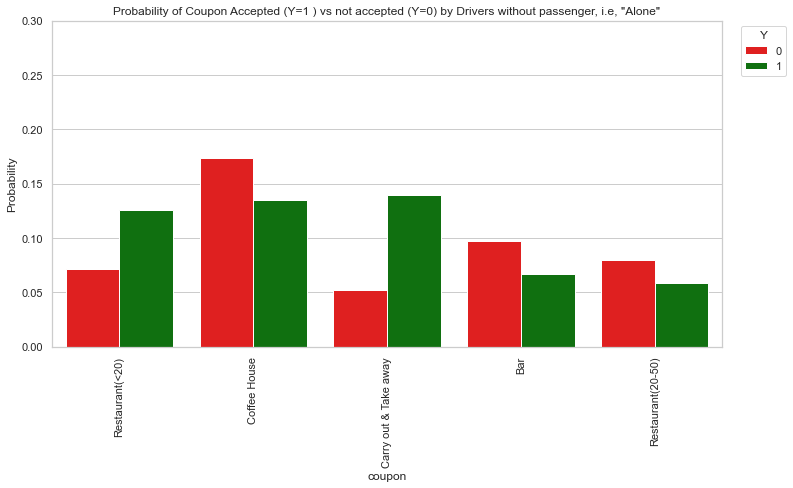

In [1223]:
fig = plt.figure(figsize = (12, 6))
plt.ylim(0,0.3)
sns.barplot(x = 'coupon',
            y = 'probability',
            data = data1a.query("passenger=='Alone'"),hue='Y',palette=sns.color_palette(['red', 'green']))
plt.title('Probability of Coupon Accepted (Y=1 ) vs not accepted (Y=0) by Drivers without passenger, i.e, "Alone"')
# Set y-axis label
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Y')
plt.xticks(rotation = 90)
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/barplotprobabilityacceptnoacceptcouponbyalonepassanger.png')

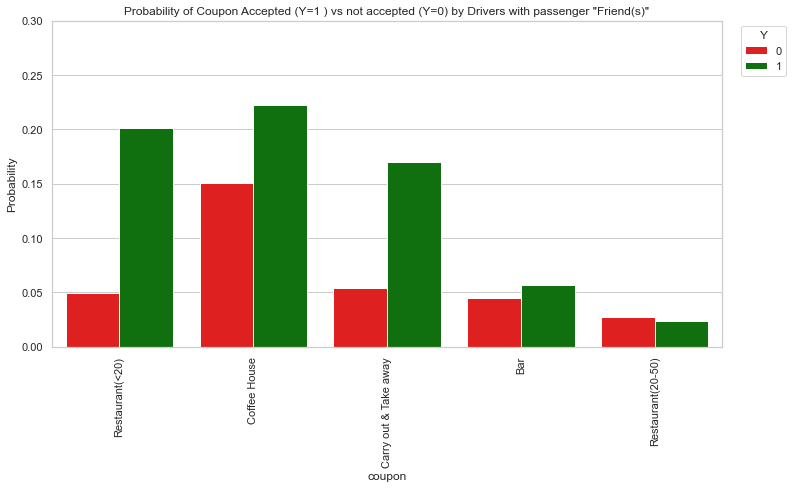

In [1220]:
fig = plt.figure(figsize = (12, 6))
plt.ylim(0,0.3)
sns.barplot(x = 'coupon',
            y = 'probability',
            data = data1a.query("passenger=='Friend(s)'"),hue='Y',palette=sns.color_palette(['red', 'green']))
plt.title('Probability of Coupon Accepted (Y=1 ) vs not accepted (Y=0) by Drivers with passenger "Friend(s)"')
# Set y-axis label
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Y')
plt.xticks(rotation = 90)
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/barplotprobabilityacceptnoacceptcouponbyfriendpassanger.png')

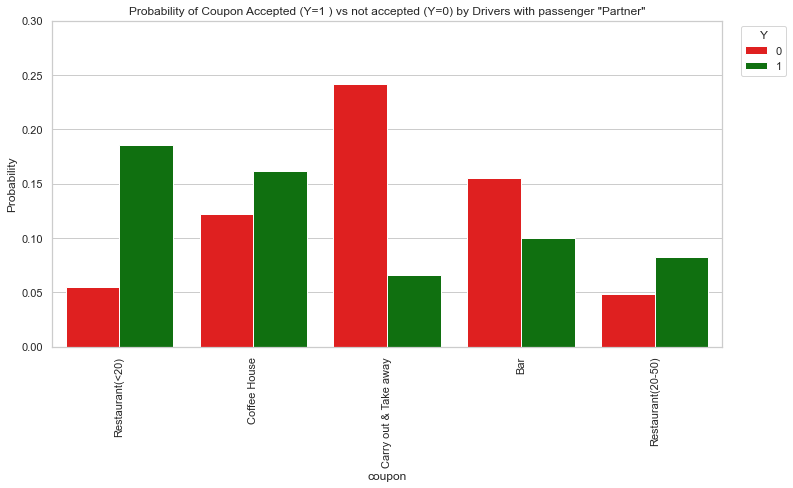

In [1221]:
fig = plt.figure(figsize = (12, 6))
plt.ylim(0,0.3)
sns.barplot(x = 'coupon',
            y = 'probability',
            data = data1a.query("passenger=='Partner'"),hue='Y',palette=sns.color_palette(['red', 'green']))
plt.title('Probability of Coupon Accepted (Y=1 ) vs not accepted (Y=0) by Drivers with passenger "Partner"')
# Set y-axis label
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Y')
plt.xticks(rotation = 90)
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/barplotprobabilityacceptnoacceptcouponbypartnerpassanger.png')

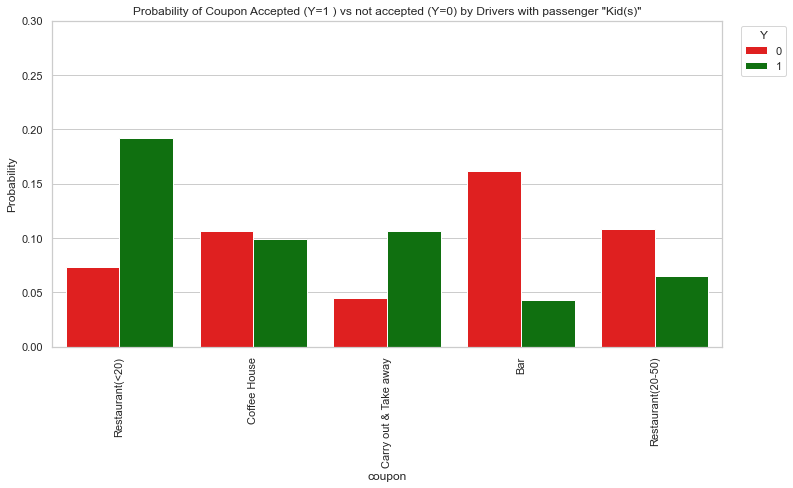

In [1222]:
fig = plt.figure(figsize = (12, 6))
plt.ylim(0,0.3)
sns.barplot(x = 'coupon',
            y = 'probability',
            data = data1a.query("passenger=='Kid(s)'"),hue='Y',palette=sns.color_palette(['red', 'green']))
plt.title('Probability of Coupon Accepted (Y=1 ) vs not accepted (Y=0) by Drivers with passenger "Kid(s)"')
# Set y-axis label
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Y')
plt.xticks(rotation = 90)
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/barplotprobabilityacceptnoacceptcouponbykidspassanger.png')

<h3 style="Font:Bold">Estimation of Conditional Probababilities  & Visualization of results for the all drivers without/with passengers  who accepted (Y=1) and did not accept(Y=0) the  coupons by weather ("Sunny", "Snowy","Rainy").</h3>

<h4 style="Font:Bold">9.Estimation of Conditional Probababilities  for the all drivers without/ with passengers who accepted (Y=1) and did not accept (Y=0) the  coupons by weather ("Sunny", "Snowy","Rainy").</h4>

In [1224]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("weather =='Sunny' & Y ==1")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.47216966256701354


In [1225]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("weather =='Sunny' & Y ==0")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.3216650898770104


In [1226]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("weather =='Snowy' & Y ==1")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.05211289813938821


In [1227]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("weather =='Snowy' & Y ==0")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.0586565752128666


In [1228]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("weather =='Rainy' & Y ==1")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.04415011037527594


In [1229]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("weather =='Rainy' & Y ==0")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.05124566382844529


<h4 style="Font:Bold">10.Visualization of Conditional Probababilities estimated  for the all drivers without/ with passengers who accepted (Y=1) and did not accept (Y=0) the  coupons by weather ("Sunny", "Snowy","Rainy").</h4>

<h5 style="Font:Bold">The results obtained in previous sections where compiled in .csv file</h5>

In [1237]:
data2a = pd.read_csv('probabilities_proj2.csv')

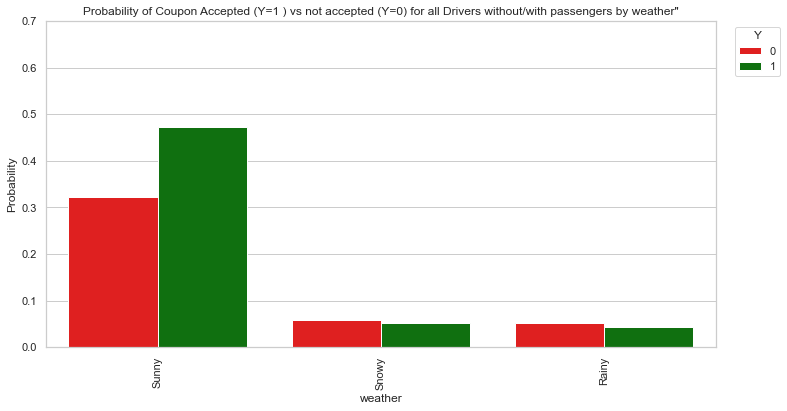

In [1231]:
fig = plt.figure(figsize = (12, 6))
plt.ylim(0,0.7)
sns.barplot(x = 'weather',
            y = 'probability',
            data = data2a.query("passenger=='Kid(s)'"),hue='Y',palette=sns.color_palette(['red', 'green']))
plt.title('Probability of Coupon Accepted (Y=1 ) vs not accepted (Y=0) for all Drivers without/with passengers by weather"')
# Set y-axis label
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Y')
plt.xticks(rotation = 90)
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/barplotprobabilityacceptnoacceptcouponbyweather.png')

In [ ]:
<h3 style="Font:Bold">Estimation of Conditional Probababilities  & Visualization of results for the all drivers without/with passengers  who accepted (Y=1) and did not accept(Y=0) the  coupons by gender ("Female", "Male").</h3>

<h4 style="Font:Bold">11.Estimation of Conditional Probababilities  for the all drivers without/ with passengers who accepted (Y=1) and did not accept (Y=0) the  coupons by gender ("Female", "Male").</h4>

In [1232]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("gender =='Female' & Y ==1")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.28090507726269315


In [1233]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("gender =='Male' & Y ==1")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.2875275938189846


In [1234]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("gender =='Female' & Y ==0")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.23241879533270263


In [1235]:
passanger_1=data["passanger"].count()
passanger_acceptedSunny =data.query("gender =='Male' & Y ==0")["passanger"].count()
passanger_acceptedSunny__passanger =(passanger_acceptedSunny/passanger_1)
print(passanger_acceptedSunny__passanger)

0.19914853358561968


In [1238]:
data3a = pd.read_csv('probabilities_proj3.csv')

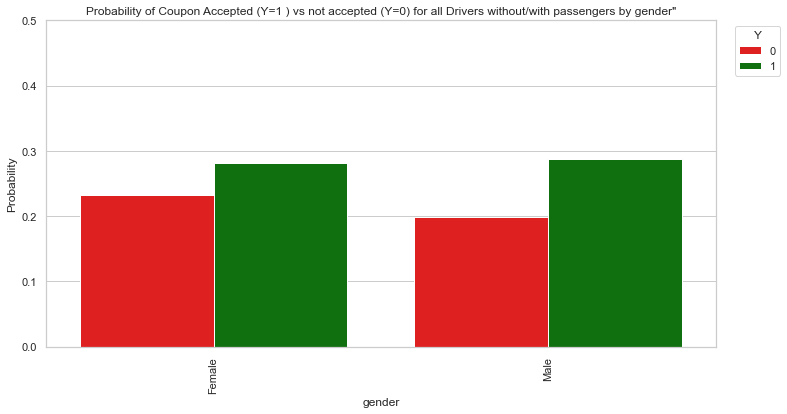

In [1241]:
fig = plt.figure(figsize = (12, 6))
plt.ylim(0,0.5)
sns.barplot(x = 'gender',
            y = 'probability',
            data = data3a.query("passenger=='Kid(s)'"),hue='Y',palette=sns.color_palette(['red', 'green']))
plt.title('Probability of Coupon Accepted (Y=1 ) vs not accepted (Y=0) for all Drivers without/with passengers by gender"')
# Set y-axis label
plt.ylabel('Probability')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left',title='Y')
plt.xticks(rotation = 90)
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/barplotprobabilityacceptnoacceptcouponbygender.png')

<h3 style="Font:Bold">Making a Hypothesis to understand the behavior of drivers without/with passsengers that go to the CoffeeHouse more than once and have income less than $50000 to all others drivers without/with passengers</h3> 

<h4 style='color:red '> Hypothesis:</h4>
        <p style="font-weight: bold">My hypothesis is the following:<p> Null Hypothesis:</p></p> ${H}_{0} : {\mu}_{CoffeHouse>1} - {\mu}_{CoffeHouse}=0  $ <br>
        <p> Alternative Hypothesis:</p><br>${H}_{1} : {\mu}_{CoffeHouse>1} - {\mu}_{CoffeHouse}>0 $ <br> <p> where ${\mu}_{CoffeHouse}$ represents the mean of all other drivers,and ${\mu}_{CoffeHouse>1}$ represents the mean of the drivers who go to the Coffee House more than once and have income less than 50000</p>

<h4>Constructing a null and alternative hypothesis for the difference between drivers without/with passengers  who go to the Coffee House more than once a month and income less than $50000 to all other drivers without/with passenger.</h4>

In [1283]:
X611=np.random.choice(data.query("CoffeeHouse > 1 & income<50000")["CoffeeHouse"].dropna(),10000)

In [1284]:
data11=[]
k=0
for j in range(0,len(data["CoffeeHouse"])):
    if (data["CoffeeHouse"][j]>1) & (data["income"][j]<50000):
        k+=1
    else:
        data11.append(data["CoffeeHouse"][j])
data11 = np.array(data11)
data11 = data11[~np.isnan(data11)]
X622=np.random.choice(data11,10000)

In [1285]:
Z11 = np.hstack((X611,X622))

In [1286]:
mean_diff11 = np.mean( X611 - X622)
print(mean_diff11)

2.8541


In [1287]:
n = 4999
diff11 = np.zeros((n,))

for j in range(n):
     
    pxi = np.random.choice( np.arange(20), 10 )
    pyi = [ i for i in np.arange(20) if i not in pxi ]
     
    px = np.mean( [ Z11[i] for i in pxi ] )
    py = np.mean( [ Z11[i] for i in pyi ] )
     
    diff11[j] = px - py

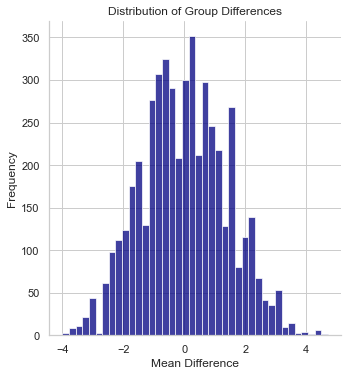

In [1295]:
sns.displot(diff11,kind="hist",color="navy")
plt.title('Distribution of Group Differences')
# Set x-axis label
plt.xlabel('Mean Difference')
# Set y-axis label
plt.ylabel('Frequency')
plt.savefig('Will-a-Customer-Accept-the-Coupon/images/diffhistohypothesiscoffeehouseincome5000.png')

In [1297]:
p_value11 = len( np.where( diff11 >= mean_diff11 )[0] )/n
print (p_value11)

0.021804360872174435


<h4 style="color:red">Comments:</h4> <h3> The p_value=0.0218 is less than ${\alpha}=0.05$ so we do reject ${H}_{0}$, i.e. the null hypothesis.</h3>

<h4 style="font-weight: bold;text-decoration: underline;color:red">Another Comments:</h4><h4> This basically mean that drivers without/with passenger with income less than $50000 go more often to the Coffee House than drivers without/with passenger with higher income, independently if the first group have accepted or not the coupon.</h4>

<h4 style="font-weight: bold">Final conclusions are condensated in the README.md file contained in the github project</h4>